In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Question 1.
Find out and show the Magnitude and Phase information of the cameraman image (Fig.1).
Perform log transformation on the magnitude spectrum and show the result. Discuss the reason
of difference between the observations (with log and without log transformation). Observe the
significance of DFT coefficients of the image by reconstructing the image with higher frequency
coefficients and lower frequency coefficients, separately without changing the phase information.
[Tips:Use FFT for finding out the DFT coefficients.]

Original Image


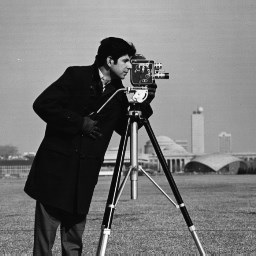

In [ ]:
lena_face = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)
print("Original Image")
cv2_imshow(lena_face)

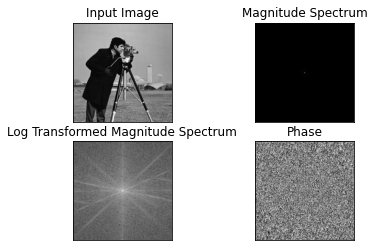

In magnitude spectrum some intensities will be orders of magnitude higher than others.
Applying a log scale allows us to see the smaller intensity values as well. Otherwise, it will become difficult to analyze image


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
magnitude_spectrum_log = np.log(np.abs(fshift)+1)
phase_spectrum=np.angle(fshift)

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(magnitude_spectrum_log, cmap = 'gray')
plt.title('Log Transformed Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(phase_spectrum, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()


print("""In magnitude spectrum some intensities will be orders of magnitude higher than others.
Applying a log scale allows us to see the smaller intensity values as well. Otherwise, it will become difficult to analyze image""")

In [ ]:
fshift,fshift.shape

(array([[ 1081.           +0.j        , -1066.49828911 -866.00081628j,
           748.53850961+1055.34291793j, ...,
          1171.60139303-1672.0152578j ,   748.53850961-1055.34291793j,
         -1066.49828911 +866.00081628j],
        [  267.43959114 -368.10135178j,    85.70130722 -657.35468479j,
           864.2237048 +1176.1718691j , ...,
          1913.13368104-3101.97472749j,  -358.54747814 +508.26193082j,
           224.94286222 +404.91687221j],
        [  350.6187221  -503.3443865j ,   347.30907438 +262.36237288j,
          -119.12582715  +84.62838042j, ...,
           899.07708474 -865.16858593j,  1084.41493725  -20.74004738j,
          -922.76283367 +492.88044151j],
        ...,
        [ 1387.19959391 +837.27901678j, -1218.8174202  -577.15617343j,
           149.08642432 +659.08054975j, ...,
          -369.80751643-1115.00970113j,  -383.08036315 -310.21270187j,
          -468.5007042  -159.46152784j],
        [  350.6187221  +503.3443865j ,  -922.76283367 -492.88044151j,
    

Image reconstruction with all components


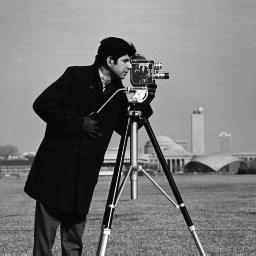

In [ ]:
print("Image reconstruction with all components")
fshift_for_ifft = np.fft.fftshift(fshift)
inverse_transform_with_all_components=np.fft.ifft2(fshift_for_ifft)
cv2_imshow(inverse_transform_with_all_components)

Image reconstruction with entire magnitude spectrum  and original phase information 


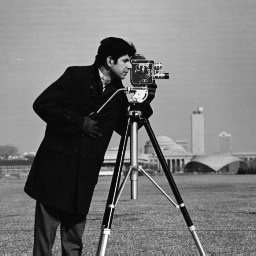


Image reconstruction with with low frequency components   and original phase information 


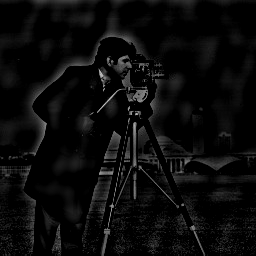


Image reconstruction with with high frequency components  and original phase information 


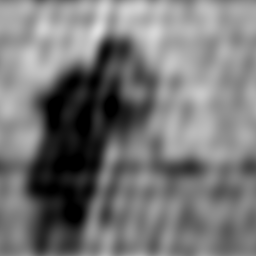

In [ ]:
#  Observe the significance of DFT coefficients of the image by reconstructing the image with
#  higher frequency coefficients and lower frequency coefficients,
#  separately without changing the phase information. 


print("Image reconstruction with entire magnitude spectrum  and original phase information ")

f = np.fft.fft2(img)

magnitude_spectrum = np.abs(f);
phase =np.exp(1j*np.angle(f));

combinedB = np.multiply(magnitude_spectrum,phase )
imgCombinedB = np.real(np.fft.ifft2(combinedB))
cv2_imshow(imgCombinedB)

print("\n===========================================================================================")
print("Image reconstruction with with low frequency components   and original phase information ")
#print(magnitude_spectrum.shape)

R= magnitude_spectrum.shape[0]
C= magnitude_spectrum.shape[1]

magnitude_spectrum_low_freq = np.array(np.zeros((R,C), dtype = np.float))

for i in range(0, magnitude_spectrum.shape[0]):
  for j in range(0, magnitude_spectrum.shape[1]):
    if magnitude_spectrum[i][j] < 100000:
      magnitude_spectrum_low_freq[i][j] = magnitude_spectrum[i][j];

#print(magnitude_spectrum_low_freq)

imgcombinedB_low = np.multiply(magnitude_spectrum_low_freq,phase )
imgCombinedB_low = np.real(np.fft.ifft2(imgcombinedB_low))
cv2_imshow(imgCombinedB_low)

print("\n===========================================================================================")
print("Image reconstruction with with high frequency components  and original phase information ")
#print(magnitude_spectrum.shape)
R= magnitude_spectrum.shape[0]
C= magnitude_spectrum.shape[1]

magnitude_spectrum_high_freq = np.array(np.zeros((R,C), dtype = np.float))


for i in range(0, magnitude_spectrum.shape[0]):
  for j in range(0, magnitude_spectrum.shape[1]):
    if magnitude_spectrum[i][j] > 100000:
      magnitude_spectrum_high_freq[i][j] = magnitude_spectrum[i][j];

#print(magnitude_spectrum_high_freq)
   

imgcombinedB_high = np.multiply(magnitude_spectrum_high_freq,phase )
imgCombinedB_high = np.real(np.fft.ifft2(imgcombinedB_high))
cv2_imshow(imgCombinedB_high)






Main referrence - http://paulbourke.net/miscellaneous/imagefilter/

https://wikimho.com/us/q/dsp/16995/image-reconstructionphase-vs-magnitude
https://fr.mathworks.com/matlabcentral/answers/1580319-why-shift-take-absolute-value-and-perform-log-transform-to-the-frequency-spectrum-of-an-image-obtai


#Question 2.
Demonstrate the significance of magnitude and phase information by reconstructing an image

with the magnitude of Fig.2(a) and phase of Fig. 2(b). Repeat the experiment with the mag-
nitude of Fig.2 (b) and phase of Fig.2 (a). [Tips: First of all resize the images to create same  dimensional images]

Original Images
------------------------------------------------------
Lena Face


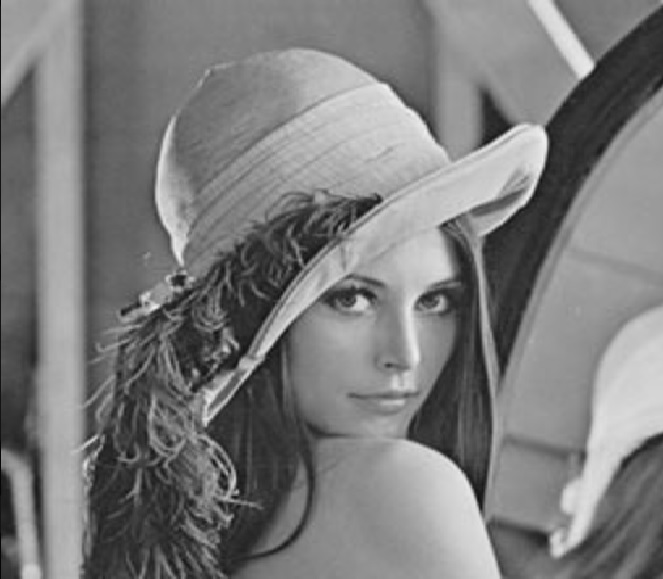

------------------------------------------------------
Einstein


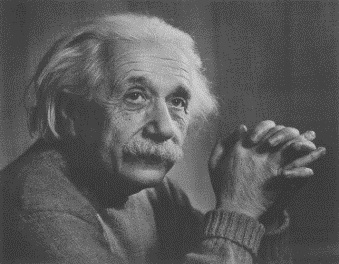

------------------------------------------------------
------------------------------------------------------


In [ ]:
lena_face = cv2.imread("/content/drive/MyDrive/AIP/A5/lena_face.jpg",0)
einstein = cv2.imread("/content/drive/MyDrive/AIP/A5/einstein.jpg",0)
print("Original Images")
print("------------------------------------------------------")
print("Lena Face")
cv2_imshow(lena_face)
print("------------------------------------------------------")
print("Einstein")
cv2_imshow(einstein)
print("------------------------------------------------------")
print("------------------------------------------------------")


In [ ]:
print(einstein.shape)
print(lena_face.shape)

(264, 339)
(579, 663)


In [ ]:
lena_face = cv2.resize(lena_face, (339, 264), interpolation = cv2.INTER_NEAREST)

In [ ]:
lena_face.shape

(264, 339)

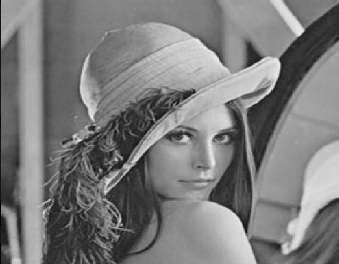

In [ ]:
cv2_imshow(lena_face)

In [ ]:
f = np.fft.fft2(einstein)
fshift1 = np.fft.fftshift(f)
phase_spectrumA = np.angle(fshift1)
magnitude_spectrumA = np.log(np.abs(fshift1))

f2 = np.fft.fft2(lena_face)
fshift2 = np.fft.fftshift(f2)
phase_spectrumB = np.angle(fshift2)
magnitude_spectrumB = np.log(np.abs(fshift2))

In [ ]:
combined = np.multiply(np.abs(f), np.exp(1j*np.angle(f2)))

In [ ]:
imgCombined = np.real(np.fft.ifft2(combined))

Image regenerated using magnitude of einstein's image and phase information from Lena's image 


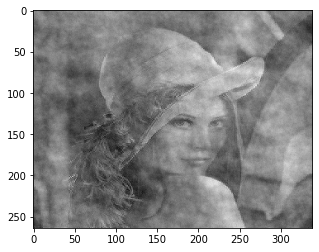

In [ ]:
print("Image regenerated using magnitude of einstein's image and phase information from Lena's image ")
plt.imshow(imgCombined, cmap='gray')

In [ ]:
combinedB = np.multiply(np.abs(f2), np.exp(1j*np.angle(f)))

In [ ]:
imgCombinedB = np.real(np.fft.ifft2(combinedB))

Image regenerated using magnitude of Lena's image and phase information from Einstein's image 


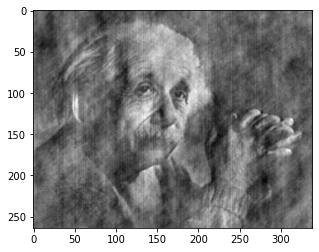

In [ ]:
print("Image regenerated using magnitude of Lena's image and phase information from Einstein's image ")
plt.imshow(imgCombinedB, cmap='gray')

#Question 3.
Implement low pass and high pass filters in frequency domain for Ideal, Butterworth (order 2), and Gaussian kernels and apply those on Fig.1. Discuss about the results.

In [ ]:
import math
def glp(im,thresh):

  # % inputs
  # % im is the fourier transform of the image
  # % thresh is the cutoff circle radius

  # %outputs
  # % res is the filtered image

  r=im.shape[0];
  c=im.shape[1];
  d0=thresh;

  d=np.array(np.zeros((r,c),dtype = np.float));
  h=np.array(np.zeros((r,c),dtype = np.float));
  res=np.array(np.zeros((r,c),dtype = np.float));



  

  for i in range (0,r):
    for j in range (0,c):
      d[i][j]=  math.sqrt( ((i-(r/2))**2 )+ (j-(c/2))**2);
  

  for i in range (0,r):
    #h[i]= math.exp ( -( (d[i]**2)/(2*(d0**2)) ) );
    h[i][j]= math.exp ( -( (d[i][j])**2)/(2*(d0**2)) ) ;


    #print(h[i])
   

  for i in range (0,r):
    for j in range (0,c):
      res[i][j]=h[i][j]*im[i][j];

  return res


In [ ]:
"""
img = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)
print("Figure  1 image")
cv2_imshow(img)

f = np.fft.fft2(img)
#fshift = np.fft.fftshift(f)
#magnitude_spectrum = np.abs(fshift)
magnitude_spectrum = np.log(1+np.abs(f))

print("Figure  1 magnitude spectrum")
cv2_imshow(magnitude_spectrum)

#plt.imshow(magnitude_spectrum, cmap = 'gray')

filtered = glp(f,30);

print("Figure  1 glp filtered")
plt.imshow(filtered, cmap = 'gray')

img = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)
print("Figure  1 image")
cv2_imshow(img)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
#magnitude_spectrum = np.log(1+np.abs(f))

#print("Figure  1 magnitude spectrum")
#plt.imshow(magnitude_spectrum, cmap = 'gray')

filtered = glp(f,30);

#print("Figure  1 glp filtered")
#plt.imshow(filtered, cmap = 'gray')

glp_img = np.real(np.fft.fftshift(np.fft.ifft2(filtered)))
plt.imshow(glp_img, cmap = 'gray')
"""


'\nimg = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)\nprint("Figure  1 image")\ncv2_imshow(img)\n\nf = np.fft.fft2(img)\n#fshift = np.fft.fftshift(f)\n#magnitude_spectrum = np.abs(fshift)\nmagnitude_spectrum = np.log(1+np.abs(f))\n\nprint("Figure  1 magnitude spectrum")\ncv2_imshow(magnitude_spectrum)\n\n#plt.imshow(magnitude_spectrum, cmap = \'gray\')\n\nfiltered = glp(f,30);\n\nprint("Figure  1 glp filtered")\nplt.imshow(filtered, cmap = \'gray\')\n\nimg = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)\nprint("Figure  1 image")\ncv2_imshow(img)\n\nf = np.fft.fft2(img)\nfshift = np.fft.fftshift(f)\nmagnitude_spectrum = np.abs(fshift)\n#magnitude_spectrum = np.log(1+np.abs(f))\n\n#print("Figure  1 magnitude spectrum")\n#plt.imshow(magnitude_spectrum, cmap = \'gray\')\n\nfiltered = glp(f,30);\n\n#print("Figure  1 glp filtered")\n#plt.imshow(filtered, cmap = \'gray\')\n\nglp_img = np.real(np.fft.fftshift(np.fft.ifft2(filtered)))\nplt.imshow(glp_img, cmap = \'

https://stackoverflow.com/questions/66935821/how-to-apply-a-lpf-and-hpf-to-a-fft-fourier-transform

ORIGINAL


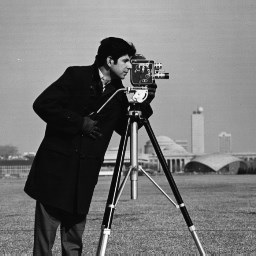



GAUSSIAN LOW PASS FILTERRED IMAGE


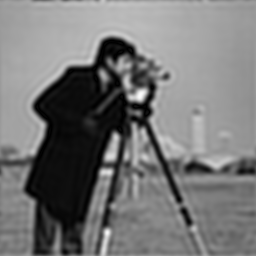



GAUSSSIAN HIGH PASS FILTERED IMAGE


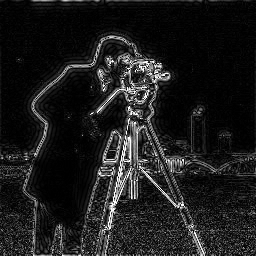

In [ ]:
## GAUSSIAN LOW PASS FILTER
import numpy as np
import cv2

# read input and convert to grayscale
img = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",0)

# do dft saving as complex output
dft = np.fft.fft2(img, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20


# create circle mask
radius = 30
mask = np.zeros_like(img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255


# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)

print("ORIGINAL")
cv2_imshow( img)
print("\n\n=========================================================")

"""
print("SPECTRUM")
cv2_imshow(spec)

print("MASK")
cv2_imshow( mask)

print("MASK2")
cv2_imshow( mask2)

print("ORIGINAL DFT/IFT ROUND TRIP")
cv2_imshow( img_back)

print("FILTERED DFT/IFT ROUND TRIP")
cv2_imshow( img_filtered)
"""
print("GAUSSIAN LOW PASS FILTERRED IMAGE")
cv2_imshow(img_filtered2)


print("\n\n=========================================================")


# create white circle mask on black background and invert so black circle on white background
radius = 32
mask = np.zeros_like(img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]
mask = 255 - mask

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255


# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
# multiply by 3 to increase brightness
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(3*img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(3*img_filtered2).clip(0,255).astype(np.uint8)


# cv2_imshow("ORIGINAL", img)
# cv2_imshow("SPECTRUM", spec)
# cv2_imshow("MASK", mask)
# cv2_imshow("MASK2", mask2)
# cv2_imshow("ORIGINAL DFT/IFT ROUND TRIP", img_back)
# cv2_imshow("FILTERED DFT/IFT ROUND TRIP", img_filtered)
print("GAUSSSIAN HIGH PASS FILTERED IMAGE")
cv2_imshow( img_filtered2)


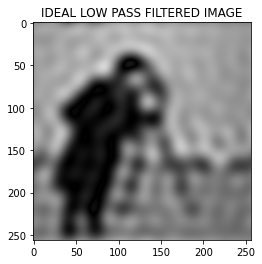

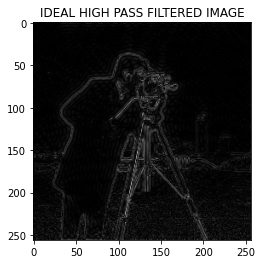

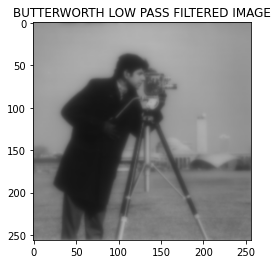

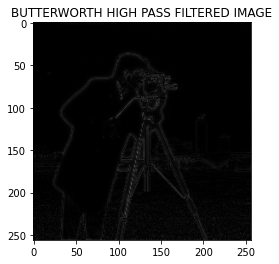

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def ideal_low_filter(lr, cr, cc, img):
  tmp = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      tmp[i, j] = (1 if np.sqrt((i - cr) ** 2 + (j - cc) ** 2) <= lr else 0)
  return tmp
def ideal_high_filter(lr, cr, cc, img):
  tmp = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      tmp[i, j] = (0 if np.sqrt((i - cr) ** 2 + (j - cc) ** 2) <= lr else 1)

  return tmp


def butterworth_low_pass(lr, cr, cc, n, img):
  tmp = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      tmp[i, j] = 1 / (1 + np.sqrt((i - cr) ** 2 + (j - cc) ** 2) / lr) ** (2 * n)
  return tmp 


def butterworth_high_pass(lr, cr, cc, n, img):
  tmp = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      tmp[i, j] = 1 / (1 + lr / np.sqrt((i - cr) ** 2 + (j - cc) ** 2)) ** (2 * n)
  return tmp   

##-----------------------------------------------------------------------------------
im_ft2 = np.fft.fft2(np.array(img)) 
im_ft2_shift = np.fft.fftshift(im_ft2)
r, c = img.shape[0], img.shape[1]
cr, cc = r // 2, c // 2 # Spectrum center 

# Ideal filter - low pass 
ideal_filter2 = ideal_low_filter(10, cr, cc, im_ft2_shift)
# Find the image after passing through the ideal low-pass filter 
tmp2 = im_ft2_shift * ideal_filter2
irreversed_im_ft22 = np.fft.ifft2(tmp2)

plt.figure()
plt.title("IDEAL LOW PASS FILTERED IMAGE")
plt.imshow(Image.fromarray(np.abs(irreversed_im_ft22)))
plt.show()

print("\n\n=========================================================")

# Ideal filter - high pass 
ideal_filter2 = ideal_high_filter(30, cr, cc, im_ft2_shift)
# Find the image after passing through the ideal low-pass filter 
tmp2 = im_ft2_shift * ideal_filter2
irreversed_im_ft22 = np.fft.ifft2(tmp2)

plt.figure()
plt.title("IDEAL HIGH PASS FILTERED IMAGE")
plt.imshow(Image.fromarray(np.abs(irreversed_im_ft22)))
plt.show()

print("\n\n=========================================================")

butterworth1 = butterworth_low_pass(30, cr, cc, 1, img)

btmp1 = im_ft2_shift * butterworth1
blena_ift21 = np.fft.ifft2(btmp1)

plt.figure()
plt.title("BUTTERWORTH LOW PASS FILTERED IMAGE")
plt.imshow(Image.fromarray(np.abs(blena_ift21)))
plt.show()


print("\n\n=========================================================")

butterworth1 = butterworth_high_pass(30, cr, cc, 1, img)

btmp1 = im_ft2_shift * butterworth1
blena_ift21 = np.fft.ifft2(btmp1)

plt.figure()
plt.title("BUTTERWORTH HIGH PASS FILTERED IMAGE")
plt.imshow(Image.fromarray(np.abs(blena_ift21)))
plt.show()

https://pythonmana.com/2022/02/202202071303353278.html

#Question 4.
Consider the image of Fig.1, and implement unsharp masking and highboost filtering in frequency
domain. Compare the results with the implementation of spatial domain operation. Tune the
parameters (cut-off frequency for frequency domain, kernel size for spatial domain, etc.) to
achieve the same results in both domains. Report the results.

In [ ]:
# Load the image
img = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",cv2.IMREAD_GRAYSCALE)
# Blur the image
img_blurred = cv2.GaussianBlur(img,(5,5),1)
mask = cv2.addWeighted(img, 1, img_blurred, -1, 0)  #input_image - blurred_image
output_image = cv2.addWeighted(img, 1, mask, 2, 0)  # input_image + k * mask

Original Image


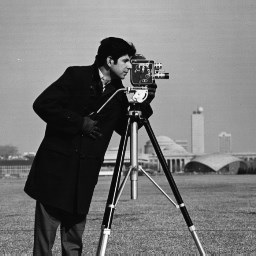



Blurred Image


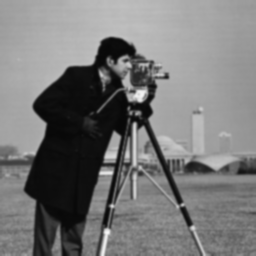



High-boost filtered image in spatial domain


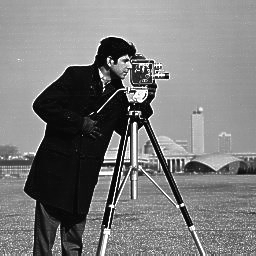

In [ ]:
print("Original Image")
cv2_imshow(img)
print("\n\n=========================================================")
print("Blurred Image")
cv2_imshow(img_blurred)
print("\n\n=========================================================")
print("High-boost filtered image in spatial domain")
cv2_imshow(output_image)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/AIP/A5/cameraman.jpg",cv2.IMREAD_GRAYSCALE)

ORIGINAL


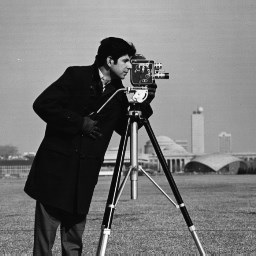

SPECTRUM


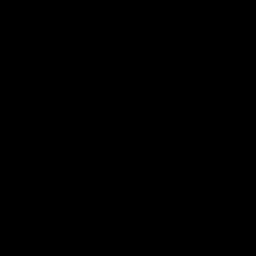

MASK


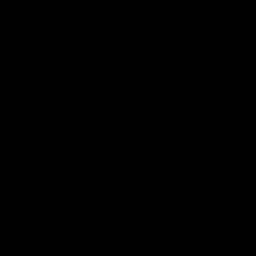

MASK2


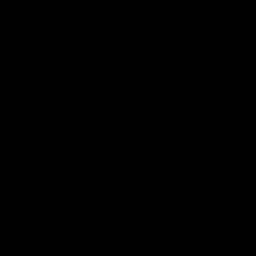

ORIGINAL DFT/IFT ROUND TRIP


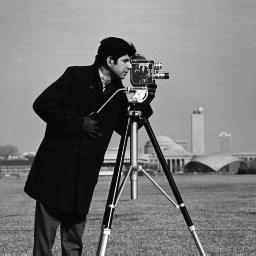

Image after Unsharp Masking


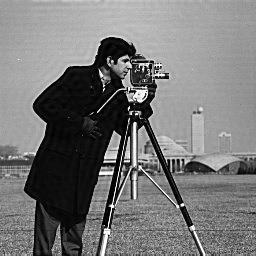

Image after high-boost filtering


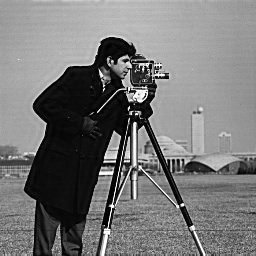

In [ ]:

import numpy as np
import cv2

# read input and convert to grayscale
#img = cv2.imread('lena_gray.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('lena.png')

# do dft saving as complex output
dft = np.fft.fft2(img, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create white circle mask on black background and invert so black circle on white background
# as highpass filter
radius = 32
mask = np.zeros_like(img, dtype=np.float32)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (1,1,1), -1)[0]
mask = 1 - mask

# high boost filter (sharpening) = 1 + fraction of high pass filter
mask = 1 + 0.5*mask 

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask)
dft_shift_masked2 = np.multiply(dft_shift,mask2)

# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)

# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)

print("ORIGINAL")
cv2_imshow(img)
print("SPECTRUM")
cv2_imshow(spec)
print("MASK")
cv2_imshow(mask)
print("MASK2")
cv2_imshow(mask2)
print("ORIGINAL DFT/IFT ROUND TRIP")
cv2_imshow(img_back)
print("Image after Unsharp Masking")
cv2_imshow(img_filtered)
print("Image after high-boost filtering")
cv2_imshow(img_filtered2)


In [ ]:
image_float32 = np.float32(img)

In [ ]:
dft = cv2.dft(image_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

In [ ]:
dft_shift = np.fft.fftshift(dft) 
rows, cols = img.shape
crow, ccol = rows//2 , cols//2 

In [ ]:
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

In [ ]:
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [ ]:
plt.imshow(img_back,cmap = 'gray')
plt.title('Ringed Image')
plt.axis('off')